<font size="+2"><p style="text-align: center;"><b> Auswertung Versuch 234 PAP 2.1. </p></font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg
from matplotlib.widgets import Cursor, Button;
from scipy.optimize import curve_fit
from scipy.stats import chi2
from math import sqrt

SpectraSuite verwendet Kommata als Dezimaltrennzeichen, die durch Punkte ersetzt werden müssen:

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',', '.'))

## 3.1 Auswertung des Sonnenspektrums

Zunächst werden die Daten mit und ohne Fenster geladen.
Die ersten 17 Zeilen sowie alle Zeilen, die mit '>' beginnen, sind Header und Kommentare und werden deshalb ausgelassen.

In [3]:
lamb_og, inten_og = np.loadtxt('data/sonne_ohne_fenster.txt',
                               skiprows = 17,
                               converters = {0:comma_to_float, 1:comma_to_float},
                               comments = '>',
                               unpack = True,
                               encoding='latin-1')

In [4]:
lamb_mg, inten_mg = np.loadtxt('data/sonne_mit_fenster.txt',
                               skiprows = 17,
                               converters = {0:comma_to_float, 1:comma_to_float},
                               comments = '>',
                               unpack = True,
                               encoding='latin-1')

Die beiden Intensitätsverteilungen werden nun in ein gemeinsames Diagramm eingezeichnet:

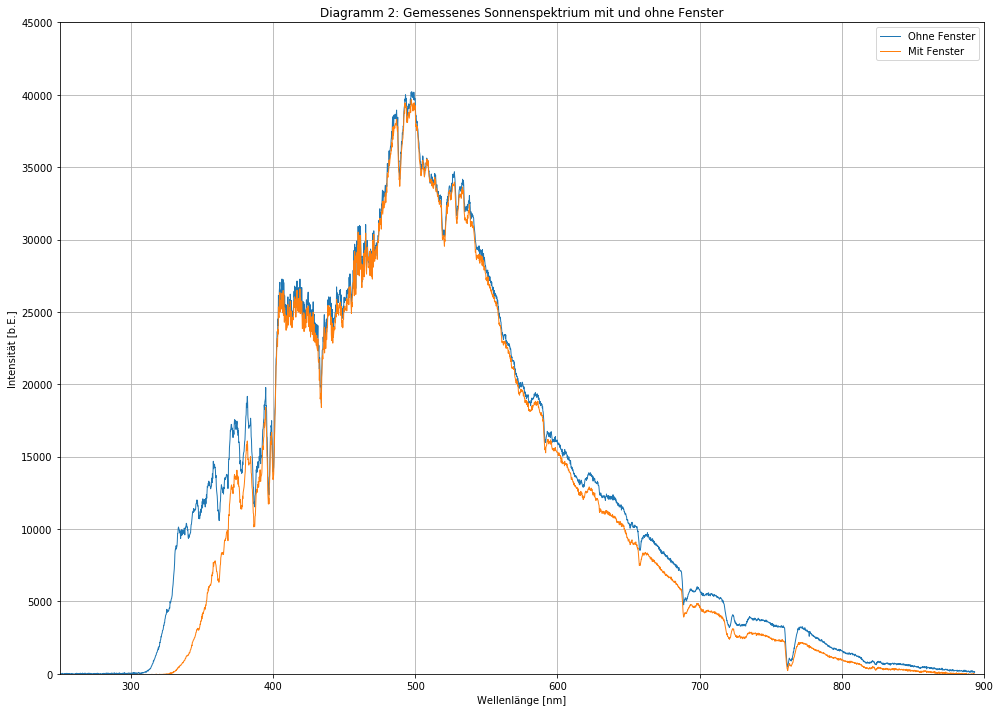

In [5]:
plt.figure(figsize=(14,10))
plt.plot(lamb_og, inten_og, label="Ohne Fenster", linewidth = 1)
plt.plot(lamb_mg, inten_mg, label="Mit Fenster", linewidth = 1)
plt.title(u"Diagramm 2: Gemessenes Sonnenspektrium mit und ohne Fenster")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.legend()
plt.grid()
plt.ylim((0, 45000))
plt.xlim((250, 900))
plt.tight_layout()
plt.savefig("figures/sonnenlicht_mit_ohne_glas.pdf", format = "pdf")

## Absorption von Glas

Die Absorption von Glas ist gegeben durch
$$A(\lambda) = 1 - \frac{I_{mG}(\lambda)}{I_{oG}(\lambda)}$$

In [6]:
A = 1 - inten_mg/inten_og

/home/jakob/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


Die Absorption wird nun als Funktion der Wellenlänge dargestellt:

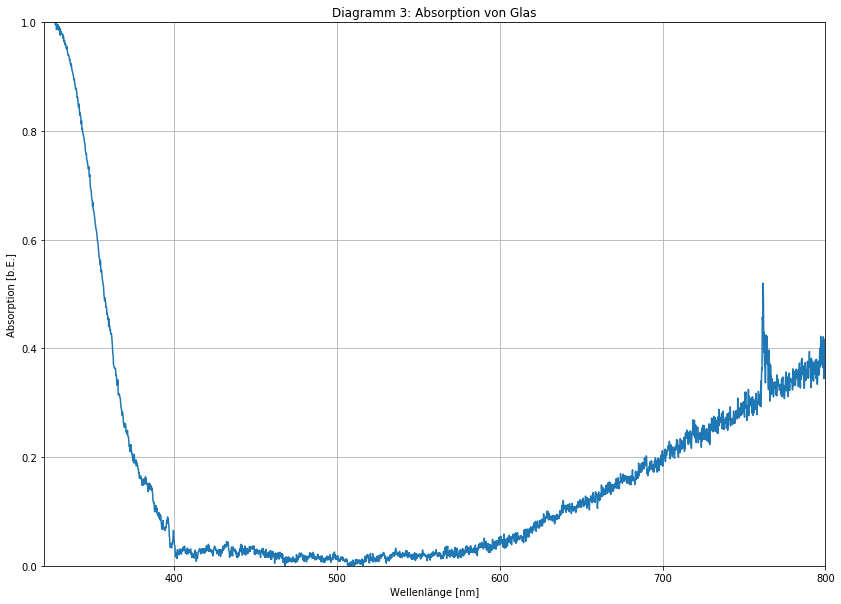

In [7]:
plt.figure(figsize=(14,10))
plt.plot(lamb_mg, A)
plt.title(u"Diagramm 3: Absorption von Glas")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u'Absorption [b.E.]')
plt.grid()
plt.ylim((0, 1))
plt.xlim((320, 800))
plt.savefig("figures/absorption_glas.pdf", format = "pdf")

## Fraunhoferlinien

Folgendes Sonnenspektrum wurde während des Versuchs aufgenommen:

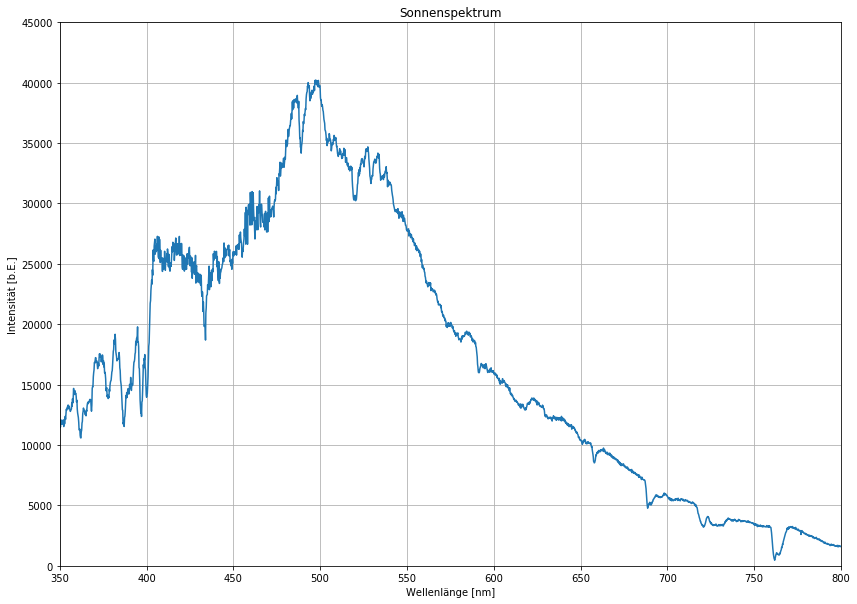

In [8]:
plt.figure(figsize=(14,10))
plt.plot(lamb_og, inten_og)
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.xlim((350, 800))
plt.ylim((0, 45000))
plt.grid()
plt.title(u"Sonnenspektrum")
plt.savefig("figures/sonnenspektrum.pdf", format = "pdf")

In einem interaktiven Plot werden nun daraus die Fraunhoferlinien abgelesen:

<IPython.core.display.Javascript object>


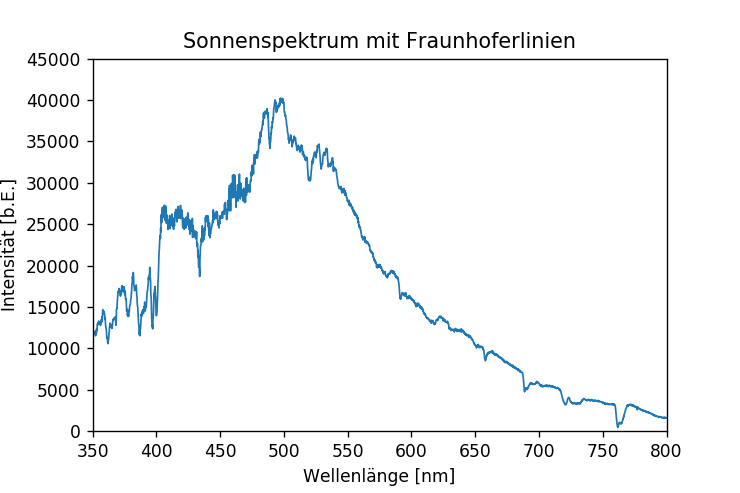

7

In [10]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(lamb_og, inten_og, linewidth = 1)
ax.set_title(u"Sonnenspektrum mit Fraunhoferlinien")
ax.set_xlabel(u"Wellenlänge [nm]")
ax.set_ylabel(u"Intensität [b.E.]")
ax.set_xlim((350, 800))
ax.set_ylim((0, 45000))

pos = [396.8701007449154, 433.05001954432885, 488.70329870656445, 519.231304971865, 528.8531925778881, 591.093577065485, 657.7732799693471, 688.6290781180713, 761.8405484405596]

def onrightclick(event):
    if event.button != 1:
        #pos.append(event.xdata)
        plt.axvline(x = event.xdata, linewidth = 1, color = "orange")

fig.canvas.mpl_connect('button_press_event', onrightclick)
#fig.canvas.mpl_connect('key_press_event', self.onKey)
#cursor = Cursor(ax, horizOn = True, vertOn = True, color = 'orange', linewidth = 1.0)

Die mit Hilfe des Cursors ausgemessenen Wellenlängen werden nun in einer neuen Abbildung dargestellt:

('Fraunhofer-Linien: ', [396.8701007449154, 433.05001954432885, 488.70329870656445, 519.231304971865, 528.8531925778881, 591.093577065485, 657.7732799693471, 688.6290781180713, 761.8405484405596])


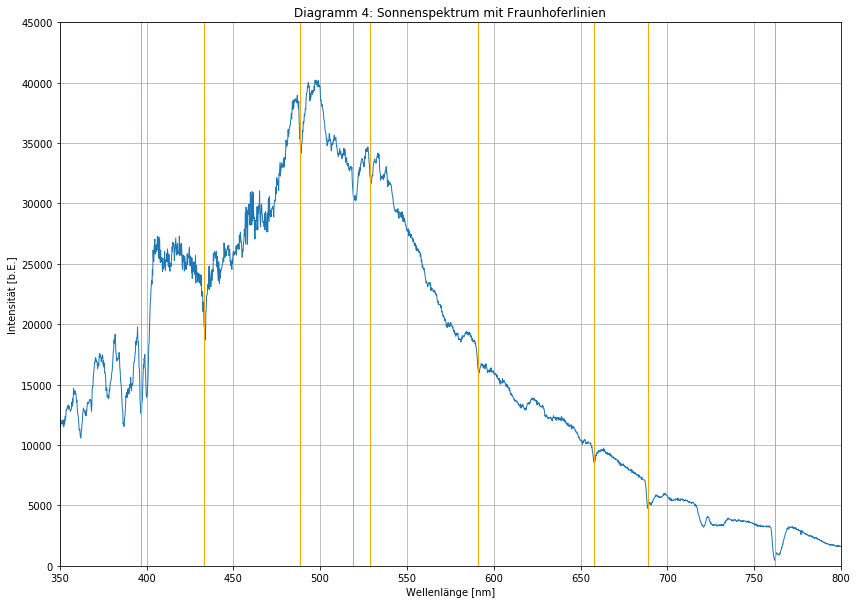

In [11]:
print("Fraunhofer-Linien: ", pos)

%matplotlib inline
plt.figure(figsize=(14,10))
plt.plot(lamb_og, inten_og, linewidth = 1)
plt.title(u"Diagramm 4: Sonnenspektrum mit Fraunhoferlinien")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.ylim((0, 45000))
plt.xlim((350, 800))
plt.grid()

# abgelesene Werte:
fraunhofer_linien = sorted(pos)

for linie in fraunhofer_linien:
    # vertikale Gerade einzeichnen
    plt.axvline(x = linie, linewidth = 1, color = "orange")

plt.savefig("figures/fraunhofer.pdf", format = "pdf")

## 3.2 Auswertung des Natriumspektrums

Zunächst werden die Datensätze wie oben geladen:

In [12]:
# Die Integrationszeit wurde so gewählt, dass hellste Linie nicht in Sättigung ist
lamb_gesamt_1, inten_gesamt_1 = \
    np.loadtxt('data/natrium_komplett_1.txt',
               skiprows = 17,
               converters = {0:comma_to_float, 1:comma_to_float},
               comments = '>',
               unpack = True,
               encoding='latin-1')

# Längere Integrationszeit, damit wesentlicher Teil des Spektrums sichtbar
lamb_gesamt_2, inten_gesamt_2 = \
    np.loadtxt('data/natrium_komplett_2.txt',
               skiprows = 17,
               converters = {0:comma_to_float, 1:comma_to_float},
               comments = '>',
               unpack = True,
               encoding='latin-1')

# Integrationszeit für 400 - 540 nm optimiert
lamb_schwach, inten_schwach = \
    np.loadtxt('data/natrium_niedrige_intensitaet.txt',
               skiprows = 17,
               converters = {0:comma_to_float, 1:comma_to_float},
               comments = '>',
               unpack = True,
               encoding='latin-1')

#### Starke Linien: 
Zuerst wird das Gesamtspektrum für die Linien hoher Intensität zwischen 300nm und 850nm mit logarithmischer Intensitätsskala betrachtet und mit Hilfe der Zoomfunktion und dem Cursor die Wellenlängen der intensiven, klar erkennbaren Linien bestimmt.

<IPython.core.display.Javascript object>


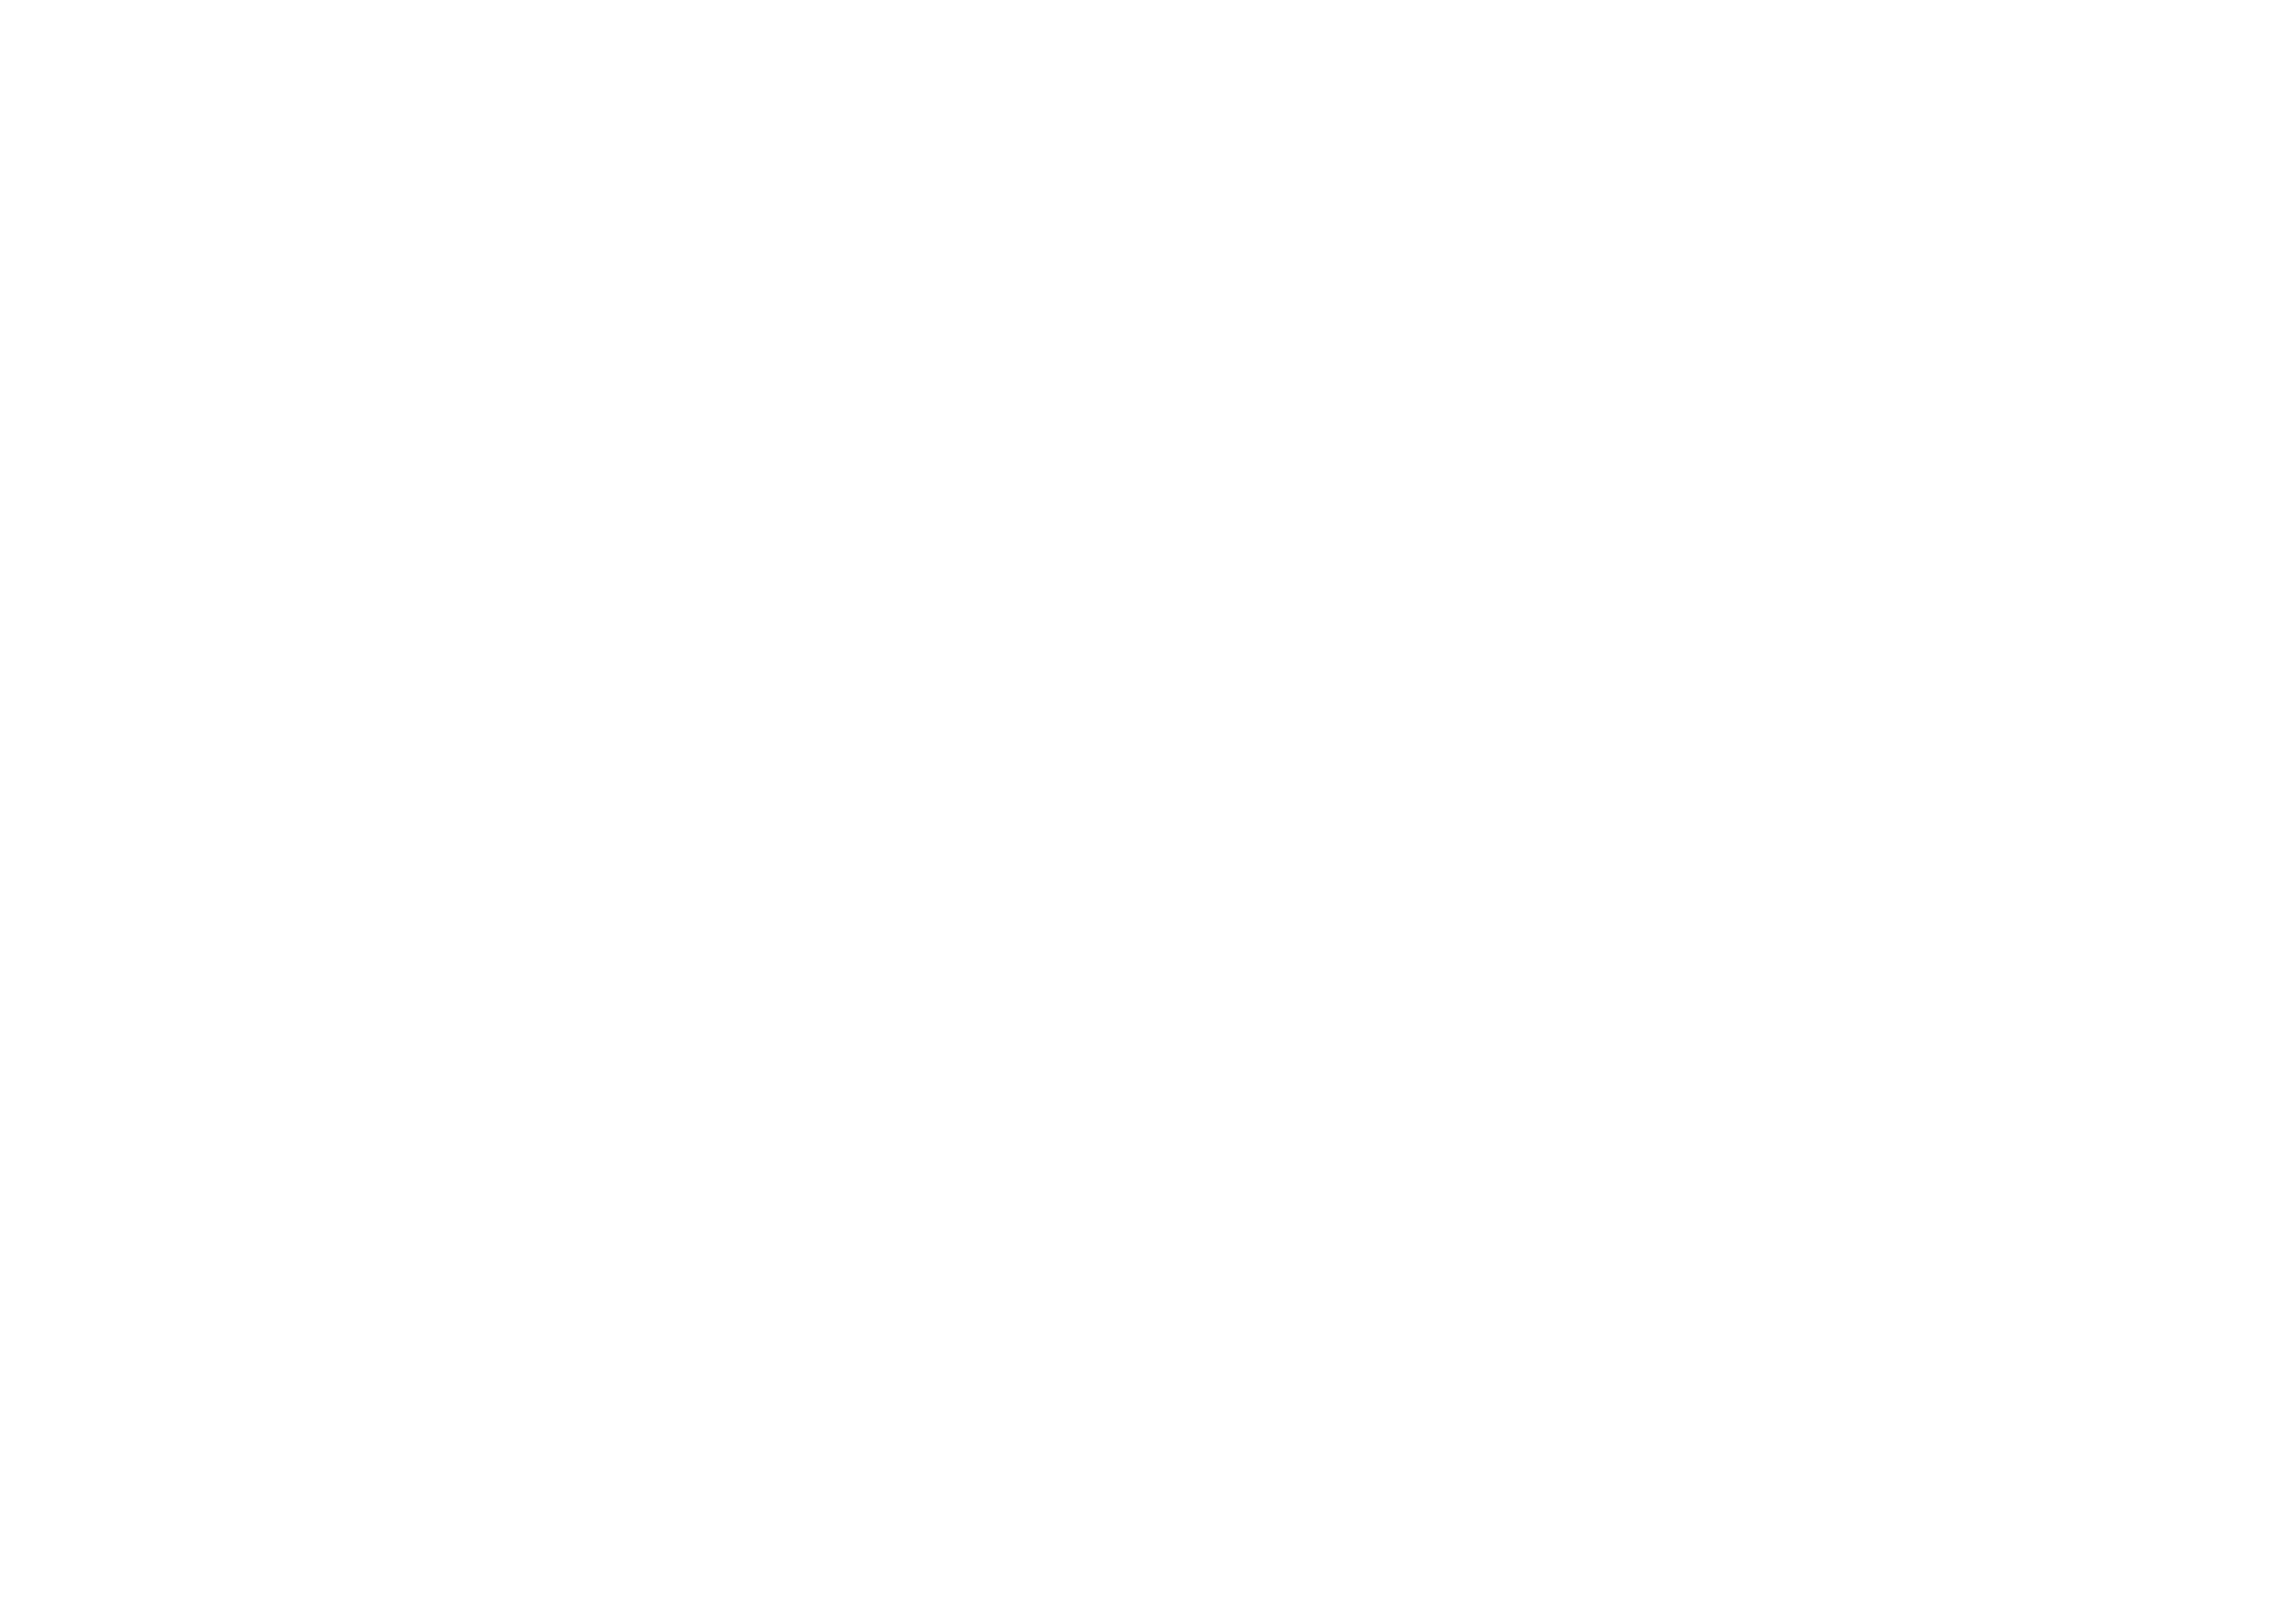

In [13]:
%matplotlib notebook
plt.figure(figsize=(14,10))
plt.plot(lamb_gesamt_1, inten_gesamt_1, linewidth = 1)
plt.title(u"Diagramm 5: Natriumspektrum")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.yscale("log")
plt.grid()
plt.ylim((10, 60000))
plt.xlim((350, 800))
plt.savefig("figures/natrium_komplett.pdf", format = "pdf")

#### Schwache Linien:
Wir plotten nun den Bereich von 300nm bis 540nm mit dem dafür optimierten Datensatz mit logarithmischer Intensitätsskala. Mit Hilfe der Zoomfunktion und des Cursors lassen sich wieder die Wellenlängen der intensiven, klar erkennbaren Linien bestimmen.

<IPython.core.display.Javascript object>


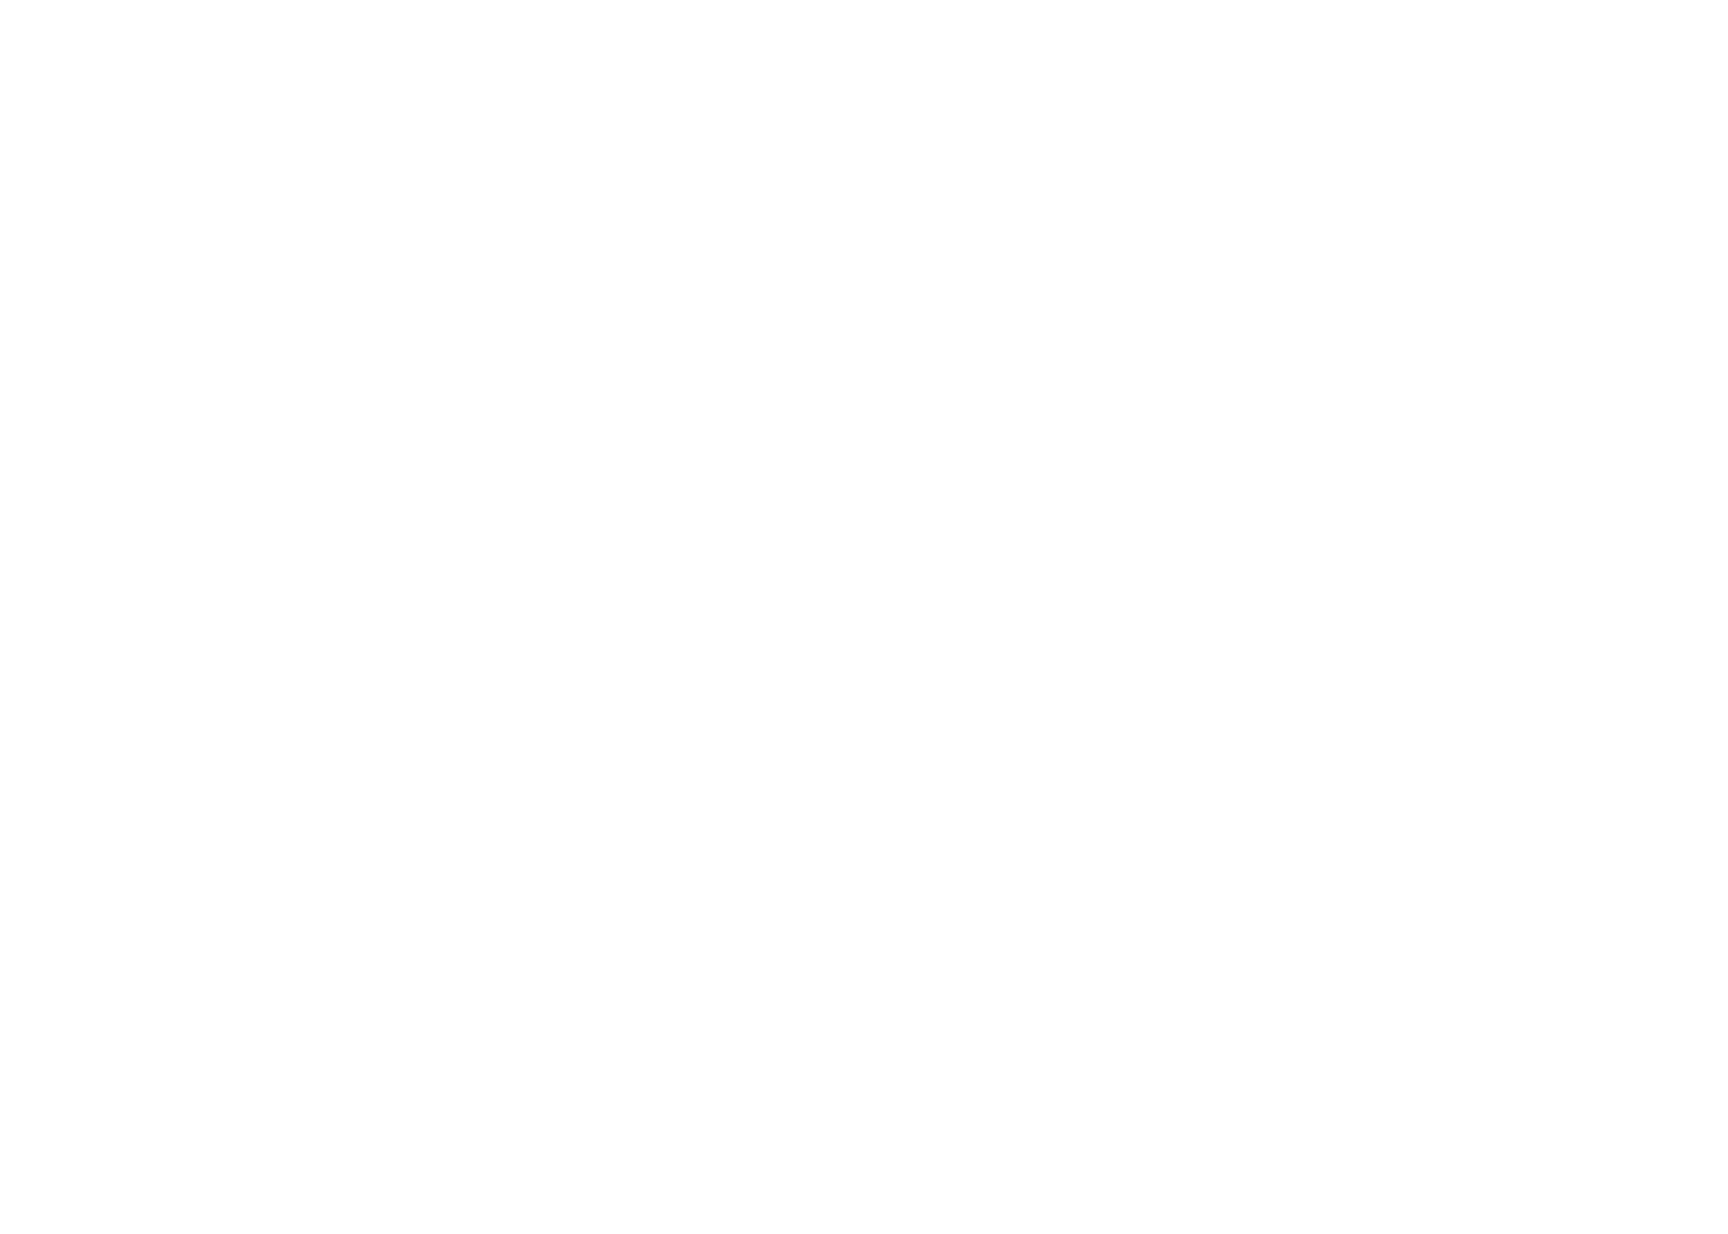

In [14]:
%matplotlib notebook
plt.figure(figsize=(14,10))
plt.plot(lamb_schwach, inten_schwach, linewidth = 1)
plt.title(u"Diagramm 6: Natriumspektrum (kurzwellig)")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.yscale("log")
plt.ylim((250, 60000))
plt.xlim((300, 540))
plt.grid()
plt.savefig("figures/natrium_schwach.pdf", format = "pdf")

Um die langwelligen Wellenlängen der schwachen Linien zu bestimmen, betrachten wir noch den Bereich von 600nm bis 850nm und messen auch hier wieder das Spektrum aus.

<IPython.core.display.Javascript object>


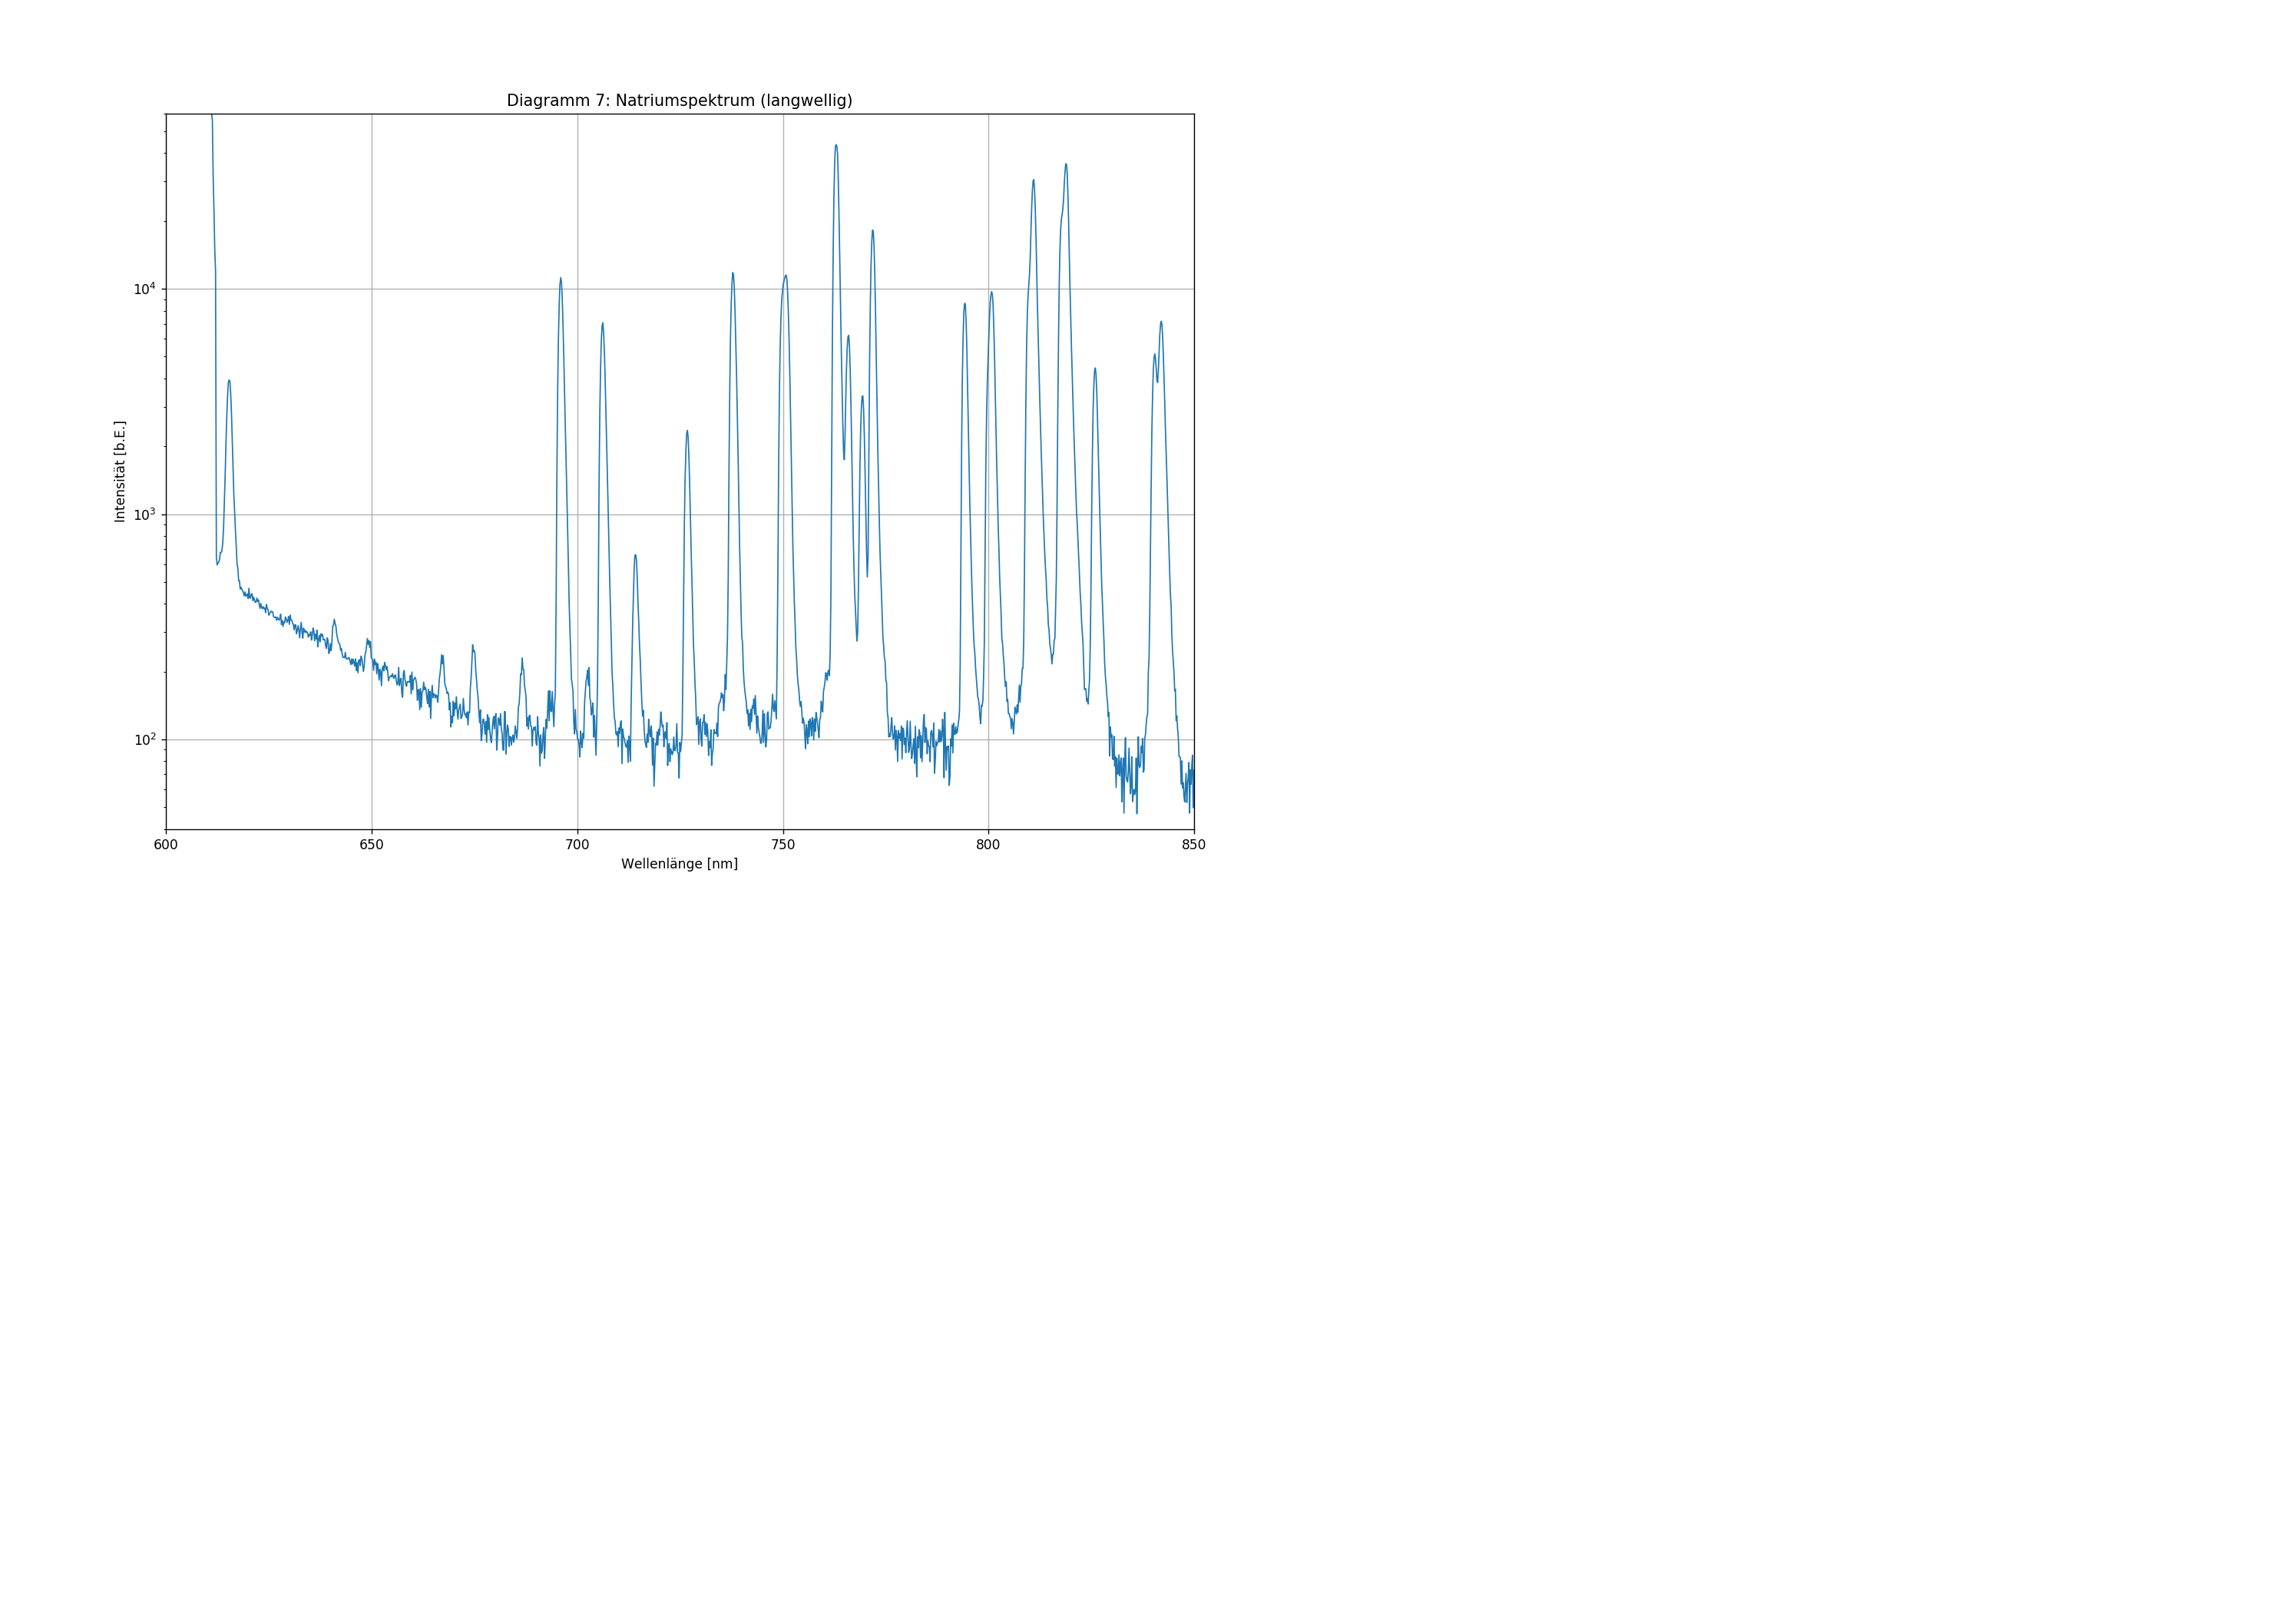

In [15]:
%matplotlib notebook
plt.figure(figsize=(14,10))
plt.plot(lamb_gesamt_2, inten_gesamt_2, linewidth = 1)
plt.title(u"Diagramm 7: Natriumspektrum (langwellig)")
plt.xlabel(u"Wellenlänge [nm]")
plt.ylabel(u"Intensität [b.E.]")
plt.yscale("log")
plt.ylim((40, 60000))
plt.xlim((600, 850))
plt.grid()
plt.savefig("figures/natrium_langwellig.pdf", format = "pdf")

## 3.3 Zuordnung der gefundenen Linien zu Serien

Die experimentell gefundenen Linien müssen nun den drei Serien des Natriums zugeordnet werden. Dazu werden die ungefähren Wellenlängen der Linien für jede Serie berechnet und diese mit den beobachteten Linien verglichen. Einige benötigte Naturkonstanten:

In [16]:
E_Ry = -13.605 # [eV], Rydbergenergie
h = 4.13567e-15 # [eV s], Plancksches Wirkungsquantum
c = 2.9979e8 # [m/s], Lichtgeschwindigkeit

### 1. Nebenserie ($md \to 3p$)

Bei diesen Übergängen können wir annehmen, dass der Korrekturterm für die d-Energieniveaus Null ist. Für die Wellenlänge $\lambda_m$ der einzelnen Übergänge gilt:
<br><center> $h\nu = \frac{hc}{\lambda_m} = E_{Ry}[eV]~/~m^2 -E_{3p}[eV]$ </center><br>
Dabei ist $m$ die Hauptquantenzahl des d-Niveaus und $E_{3p}$ die Energie des 3p Zustandes in Elektronenvolt. Wir nehmen an, dass die Linie bei 818,8 nm zu m = 3 gehört. Daraus ergibt sich:

In [17]:
m = 3
E_3p = E_Ry/m**2 - h*c/818.8e-9
E_3p_ = E_Ry/m**2 - h*c/((818.8 + 1.4)*1e-9)
print("E_3p = ", E_3p, "+-", abs(E_3p - E_3p_))
print(h*c*1.4/818.8/(818.8*1e-9))

('E_3p = ', -3.0258734440237745, '+-', 0.0025846006928795795)
0.00258901989289


Der Fehler wird durch Einsetzen einer Grenze des Fehlerbereichs berechnet.

Nun können die erwarteten Wellenlängen berechnet werden, wobei sich die Fehler wieder durch Einsetzen ergeben:

In [18]:
for m in range(3, 13):
    l = h*c/(E_Ry/m**2 - E_3p)*1e9
    l_ = h*c/(E_Ry/m**2 - E_3p_)*1e9
    Dl = abs(l - l_)
    print('m={m:2d}, lambda={l:6.2f}+-{Dl:6.2f}'.format(m=m, l=l, Dl=Dl))

m= 3, lambda=818.80+-  1.40
m= 4, lambda=569.89+-  0.68
m= 5, lambda=499.60+-  0.52
m= 6, lambda=468.22+-  0.46
m= 7, lambda=451.14+-  0.42
m= 8, lambda=440.70+-  0.41
m= 9, lambda=433.82+-  0.39
m=10, lambda=429.03+-  0.38
m=11, lambda=425.56+-  0.38
m=12, lambda=422.95+-  0.37


Im Protokollheft findet sich für diese Serie eine Tabelle, in der die gemessenen Wellenlängen als Funktion von m eingetragen sind.

### 2. Nebenserie ($ms \to 3p$)

Die Rechnungen erfolgen analog zur 1. Nebenserie mit dem einzigen Unterschied, dass diesmal der Korrekturterm nicht vernachlässigt wird:
<br><center> $E_{3s} = E_{3p} - 1.2398*10^3[nm~eV]~/~\lambda$ </center><br>
Aus $E_{3s}$ lässt sich nun der Korrekturfaktor $\Delta_s$ gemäß:
<br><center> $E_{3s} = -13.605eV~/~(3-\Delta_s)^2$ </center><br>
        berechnen. Wir nutzen noch aus, dass die gelbe D-Linie des Natriums bei $\lambda = 589nm$ dem Übergang $3p \to 3s$ entspricht. Auch hier werden die zuvor gemessenen Linien dieser Serie zugeordnet und in eine Tabelle eingetragen.

In [19]:
E_3s = E_3p - h*c/588.8e-9
E_3s_ = E_3p_ - h*c/((588.8 + 1.0)*1e-9)
print("E_3s = ", E_3s, "+-", abs(E_3s - E_3s_))

('E_3s = ', -5.1315672437860025, '+-', 0.006154783466297609)


In [20]:
Delta_s = sqrt(E_Ry/E_3s) - 3
Delta_s_ = sqrt(E_Ry/E_3s_) - 3
print("Delta_s = ", Delta_s, "+-", abs(Delta_s - Delta_s_))

('Delta_s = ', -1.371738099720573, '+-', 0.000977345016534903)


In [21]:
for m in range(4, 10):
    l = h*c/(E_Ry/(m - Delta_s)**2 - E_3p)*1e9
    l_ = h*c/(E_Ry/(m - Delta_s_)**2 - E_3p_)*1e9
    Dl = abs(l - l_)
    print('m={m:2d}, lambda={l:6.2f}+-{Dl:6.2f}'.format(m=m, l=l, Dl=Dl))

m= 4, lambda=485.37+-  0.52
m= 5, lambda=460.77+-  0.46
m= 6, lambda=446.70+-  0.43
m= 7, lambda=437.83+-  0.41
m= 8, lambda=431.85+-  0.39
m= 9, lambda=427.62+-  0.39


### Hauptserie ($mp \to 3s$)

Aus $E_{3p}$ wird wieder der Korrekturfaktor $\Delta_p$ bestimmt:
<br><center> $E_{3p} = -13.605eV~/~(3-\Delta_p)^2$ </center><br>
sowie die Wellenlängen für m=4 und 5:
<br><center> $\lambda_m[nm] \approx \frac{1.2398*10^3[nm~eV]}{-13.605eV~/~(m-\Delta_p)^2 - E_{3s}[eV]}$ </center><br>

In [22]:
Delta_p = sqrt(E_Ry/E_3p) - 3
Delta_p_ = sqrt(E_Ry/E_3p_) - 3
print("Delta_p = ", Delta_p, "+-", abs(Delta_p - Delta_p_))

('Delta_p = ', -0.879570229013229, '+-', 0.0009061809392800768)


In [23]:
for m in range(4, 6):
    l = h*c/(E_Ry/(m - Delta_p)**2 - E_3s)*1e9
    l_ = h*c/(E_Ry/(m - Delta_p_)**2 - E_3s_)*1e9
    Dl = abs(l - l_)
    print('m={m:2d}, lambda={l:6.2f}+-{Dl:6.2f}'.format(m=m, l=l, Dl=Dl))

m= 4, lambda=271.88+-  0.38
m= 5, lambda=261.68+-  0.35


## 3.4 Bestimmung der Serienenergien und der Korrekturfaktoren

### 1. Nebenserie

Mit Hilfe der gemessenen Wellenlängen der Serien, wird nun noch die Rydbergenergie $E_{Ry}, E_{3p}$ und die Korrekturterme $\Delta_d$ und $\Delta_s$ bestimmt. Die zugeordneten Wellenlängen sind:

In [24]:
wellenl = np.array([818.8, 568.1, 497.7, 466.3, 450.0, 438.6, 433.0, 429.6])
fehler = np.array([1.4, 1.0, 0.7, 0.9, 2.0, 1.0, 1.2, 0.8])
quantenz = np.arange(3, 11)

Die folgende Funktion, die die Wellenlänge angibt, soll an diese Daten gefittet werden:

In [25]:
def fit_func_1(m, _E_Ry, _E_3p, D_d):
    return h*c/(_E_Ry/(m - D_d)**2 - _E_3p)*1e9

Dazu werden Startwerte für die Parameter $E_{Ry}$, $E_{3p}$ und $\Delta_d$ gewählt:

In [26]:
para = [-13.6, -3, -0.02]
popt, pcov = curve_fit(fit_func_1, quantenz, wellenl, sigma = fehler, p0 = para)

Nun werden die Ergebnisse des Fits mit den jeweiligen Fehlern ausgegeben:

In [27]:
print("E_Ry = ", popt[0], ", Standardfehler = ", np.sqrt(pcov[0][0]))
print("E_3p = ", popt[1], ", Standardfehler = ", np.sqrt(pcov[1][1]))
print("D_d = ", popt[2], ", Standardfehler = ", np.sqrt(pcov[2][2]))

('E_Ry = ', -13.00315267833969, ', Standardfehler = ', 0.3211939102607719)
('E_3p = ', -3.025123249267771, ', Standardfehler = ', 0.005544718858981702)
('D_d = ', 0.06663288712861634, ', Standardfehler = ', 0.031974873914274615)


Schließlich werden noch die $\chi^2$- und $\chi_{\text{red}}^2$-Werte berechnet, um die Güte des Fits zu bestimmen. Der Freiheitsgrad berechnet sich dabei aus der Anzahl der Messwerte abzüglich der Zahl der Fitparameter.

In [28]:
chi2_ = np.sum((fit_func_1(quantenz, *popt) - wellenl)**2/fehler**2)
dof = len(quantenz) - 3
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

('chi2 = ', 4.252363118342255)
('chi2_red = ', 0.850472623668451)


Wir berechen noch die Fitwahrscheinlichkeit, das heißt die Wahrscheinlichkeit, dass man bei einer Wiederholungsmessung ein $\chi^2$- Wert erhält, der größer oder gleich dem berechneten $\chi^2$- Wert ist.

In [29]:
prob = round(1 - chi2.cdf(chi2_, dof), 2)*100
print("Wahrscheinlichkeit:", prob, "%")

('Wahrscheinlichkeit:', 51.0, '%')


Die zugeordneten Wellenlängen werden gemeinsam mit der gefitteten Funktion in ein Diagramm eingetragen:

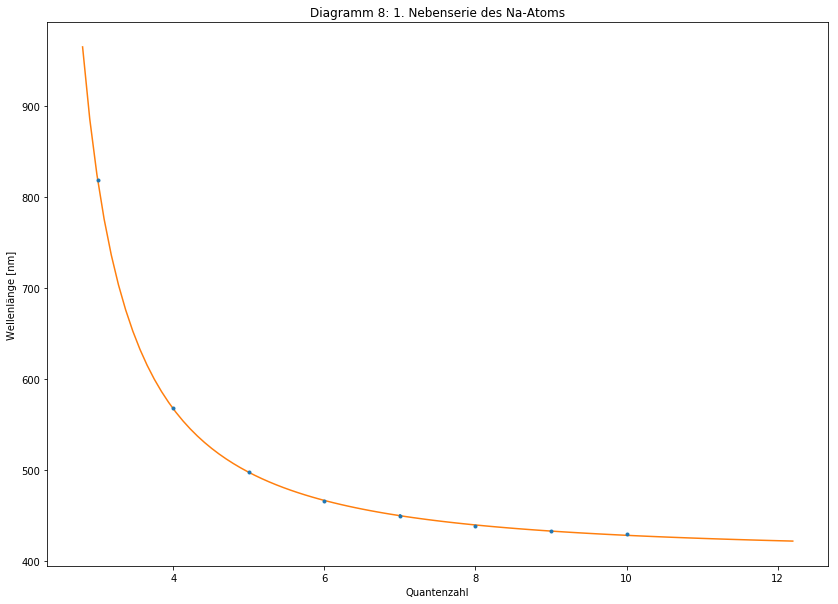

In [30]:
%matplotlib inline
plt.figure(figsize=(14,10))
plt.errorbar(quantenz, wellenl, fehler, fmt = ".")
plt.xlabel(u"Quantenzahl")
plt.ylabel(u"Wellenlänge [nm]")
plt.title(u"Diagramm 8: 1. Nebenserie des Na-Atoms")
x = np.linspace(2.8, 12.2, 100)
plt.plot(x, fit_func_1(x, *popt))
plt.savefig("figures/nebenserie_1.pdf", format = "pdf")

### 2. Nebenserie 

Analog zur 1. Nebenserie werden obige Berechnungen auch für die 2. Nebenserie des Na-Atoms durchgeführt.

In [31]:
wellenl = np.array([484.6, 459.2, 438.6, 426.4])
fehler = np.array([1.7, 1.6, 1.0, 1.3])
quantenz = np.array([4,5,7,9])

In [32]:
def fit_func_1(m, _E_Ry, _E_3p, D_s):
    return h*c/(_E_Ry/(m - D_s)**2 - _E_3p)*1e9

In [33]:
para = [-13.6, -3, -0.02]
popt, pcov = curve_fit(fit_func_1, quantenz, wellenl, sigma = fehler, p0 = para)

In [34]:
print("E_Ry = ", popt[0], ", Standardfehler = ", np.sqrt(pcov[0][0]))
print("E_3p = ", popt[1], ", Standardfehler = ", np.sqrt(pcov[1][1]))
print("D_s = ", popt[2], ", Standardfehler = ", np.sqrt(pcov[2][2]))

('E_Ry = ', -16.474155970696717, ', Standardfehler = ', 10.107652020571114)
('E_3p = ', -3.0425046100707647, ', Standardfehler = ', 0.056239565279388976)
('D_s = ', -1.8503682574495777, ', Standardfehler = ', 1.492174409686771)


In [35]:
chi2_ = np.sum((fit_func_1(quantenz, *popt) - wellenl)**2/fehler**2)
dof = len(quantenz) - 3
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

('chi2 = ', 1.9483455929285616)
('chi2_red = ', 1.9483455929285616)


In [36]:
prob = round(1 - chi2.cdf(chi2_, dof), 2)*100
print("Wahrscheinlichkeit:", prob, "%")

('Wahrscheinlichkeit:', 16.0, '%')


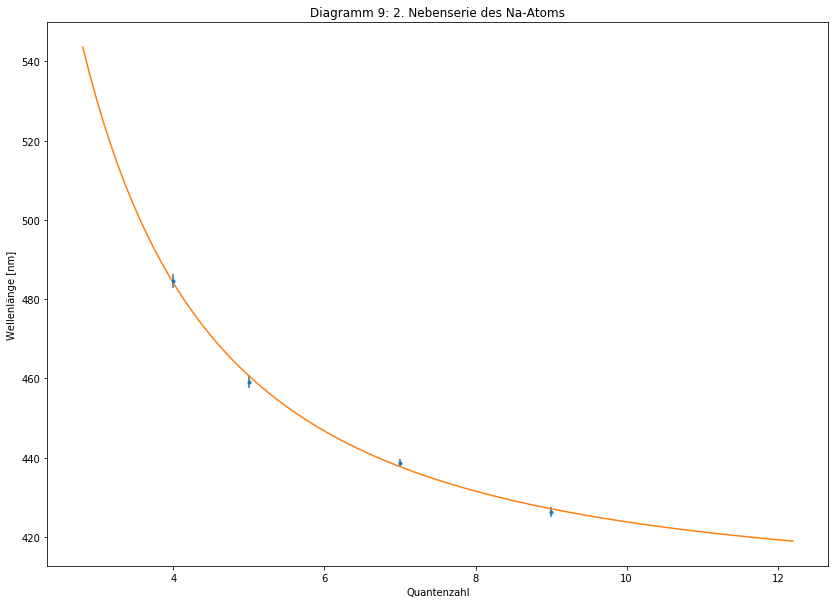

In [37]:
%matplotlib inline
plt.figure(figsize=(14,10))
plt.errorbar(quantenz, wellenl, fehler, fmt = ".")
plt.xlabel(u"Quantenzahl")
plt.ylabel(u"Wellenlänge [nm]")
plt.title(u"Diagramm 9: 2. Nebenserie des Na-Atoms")
x = np.linspace(2.8, 12.2, 100)
plt.plot(x, fit_func_1(x, *popt))
plt.savefig("figures/nebenserie_2.pdf", format = "pdf")
